# Game of Life


The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


## Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
* Increase the size of the GoF's world and play with more advanced and complex patterns

In [ ]:
# Imports
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image

# TODO:
# Add in update function a way to recognize when newGrid has the initial configuration (grid)
# Count the alive cells at every step
# How many cells has changed state (and then average on the total number of step)
# Speed to spaceships for instance is the time between two given points in the grid

In [394]:
ON = 255  # Alive cell value
OFF = 0   # Dead cell value

n_steps = 30 # Total number of steps
it = 100 # Time between each step

def update(frame_num, img, grid, initial_grid, step):
    newGrid = grid.copy()

    Nr = grid.shape[0]
    Nc = grid.shape[1]
    
    for i in range(Nr):
        for j in range(Nc):
            total = int((grid[i, (j-1)%Nc] + grid[i, (j+1)%Nc] +
                         grid[(i-1)%Nr, j] + grid[(i+1)%Nr, j] +
                         grid[(i-1)%Nr, (j-1)%Nc] + grid[(i-1)%Nr, (j+1)%Nc] +
                         grid[(i+1)%Nr, (j-1)%Nc] + grid[(i+1)%Nr, (j+1)%Nc]) / ON)

            if grid[i, j] == ON:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = OFF
            else:
                if total == 3:
                    newGrid[i, j] = ON

    img.set_data(newGrid)
    grid[:] = newGrid[:]

    # Append 1 if the pattern returned to the original configuration; 0 otherwise
    step.append(1 if np.array_equal(grid,initial_grid) else 0)

    return img


def loadPattern(file_path, rows=None, columns=None, loc=(0,0)):
    # Open file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Remove whitespaces, and ignore lines starting with '!'
    lines = [line.strip() for line in lines if not line.startswith('!')]

    # Check if the number of rows and columns were specified
    if rows == None:
        rows = len(lines)
    if columns == None:
        columns = max(len(line) for line in lines) 
    
    # Pad shorter lines with zeros to make them equal in length
    max_length = max(len(line) for line in lines) 
    lines_padded = [line.ljust(max_length, '.') for line in lines]
    
    # Create the grid and the pattern
    grid = np.zeros((rows, columns))
    pattern = np.array([[0 if cell == '.' else 255 for cell in line] for line in lines_padded])
    
    # Check if parameters are ok
    if loc[0] > rows or loc[1] > columns:
        raise ValueError("Invalid location parameter")
    
    if loc[0] + pattern.shape[0] > rows or loc[1] + pattern.shape[1] > columns:
        raise ValueError("The pattern overflows the grid")
    
    # Put the pattern in the grid
    grid[loc[0]:loc[0]+pattern.shape[0], loc[1]:loc[1]+pattern.shape[1]] = pattern
    
    # Return the grid
    return grid


def saveFrame(frameNum, img, grid):
    plt.savefig(f'gof_frame_{frameNum:03d}.png', format='png')
    return img

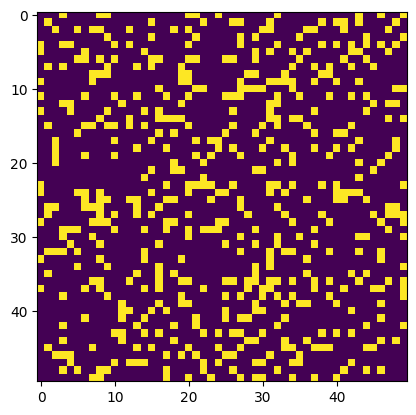

In [395]:
# Random generation example
N = 50
random_grid = np.random.choice([ON, OFF], N*N, p=[0.2, 0.8]).reshape(N, N)

# Original configuration
random_igrid = random_grid.copy() 

# List of step status: the i-th element is 1 if the pattern returned to the original configuration; 0 otherwise
step_cycle = []

# Plot generation
fig, ax = plt.subplots()
img = ax.imshow(random_grid, interpolation='nearest')
plt.plot()

# Set up the animation
random_out = animation.FuncAnimation(fig, update, fargs=(img, random_grid, random_igrid, step_cycle),
                            frames=60, interval=1000,
                            init_func=lambda: saveFrame(0, img, random_grid))

In [396]:
# Save and show animation
gif_name = 'random_example.gif'
random_out.save(gif_name, writer='pillow', fps=2)
Image(url=gif_name)

<Figure size 640x480 with 0 Axes>

In [ ]:
# Still life example (period 1)

# Load patterns from file.
# Patterns can be find at https://conwaylife.com/patterns/ (Download the .cells file and save as .txt)
pattern = 'beehiveatloaf.cells.txt'

grid = loadPattern(pattern, 25, 25, (1, 2))

# Plot generation
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
plt.plot()

# Set up the animation
output = animation.FuncAnimation(fig, update, fargs=(img, grid),
                              frames=60, interval=1000,
                              init_func=lambda: saveFrame(0, img, grid))

In [ ]:
# To save the animation as a GIF using Pillow
gif_name = 'beehiveatloaf.gif'
output.save(gif_name, writer='pillow', fps=2)

Image(url=gif_name)

In [ ]:
# Glider example

# Load patterns from file.
# Patterns can be find at https://conwaylife.com/patterns/ (Download the .cells file and save as .txt)
pattern = 'bigglider.cells.txt'

grid = loadPattern(pattern, 50, 50, (25,25))

# Plot generation
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
plt.plot()

# Set up the animation
output = animation.FuncAnimation(fig, update, fargs=(img, grid),
                              frames=50, interval=200, repeat=False,
                              init_func=lambda: saveFrame(0, img, grid))

In [ ]:
# To save the animation as a GIF using Pillow

gif_name = 'bigglider.gif'
output.save(gif_name, writer='pillow', fps=10)

Image(url=gif_name)

0


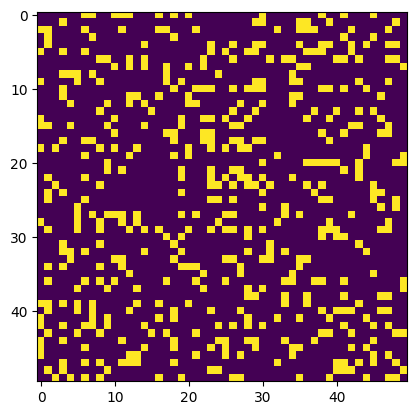

In [388]:
# Oscillator example (period 3)

# Load patterns from file.
# Patterns can be find at https://conwaylife.com/patterns/ (Download the .cells file and save as .txt)
pulsar = 'pulsar_cells.cells.txt'

pulsar_grid = loadPattern(pulsar_p3, 25,25, (5,5))

# Original configuration
pulsar_igrid = oscillator_grid.copy() 

# List of step status: the i-th element is 1 if the pattern returned to the original configuration; 0 otherwise
step_cycle = []

# Plot generation
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest')
plt.plot()

# Set up the animation
output = animation.FuncAnimation(fig, update, fargs=(img, pulsar_grid, pulsar_igrid, step_cycle),
                              frames=n_frames, interval=it, repeat=False,
                              init_func=lambda: saveFrame(0, img, pulsar_grid))

In [389]:
# To save the animation as a GIF using Pillow
gif_name = 'pulsar_period3.gif'
output.save(gif_name, writer='pillow', fps=2)

Image(url=gif_name)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


<Figure size 640x480 with 0 Axes>

ValueError: x and y must have same first dimension, but have shapes (30,) and (60,)

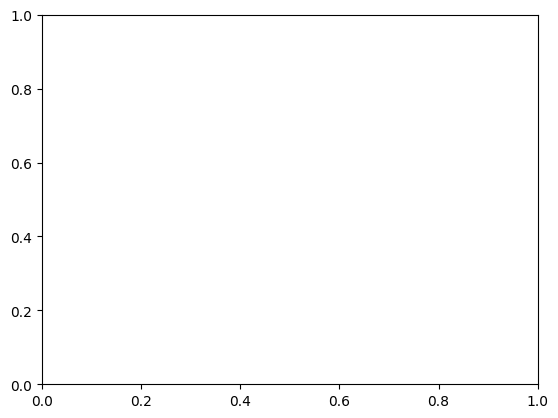

In [397]:
plt.plot(range(n_steps),step_cycle)